---

# **Módulo** | Python: Programação Funcional
Caderno de **Exercícios**<br> 

---

# **Tópicos**

<ol type="1">
  <li>Função lambda;</li>
  <li>Função map;</li>
  <li>Função filter;</li>
  <li>Função reduce;</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos trabalhar com o arquivo csv com dados de crédito, definido abaixo.
Execute cada uma das células de código para escrever os arquivos na sua máquina virtual

In [116]:
%%writefile credito.csv
id_vendedor,valor_emprestimos,quantidade_emprestimos,data
104271,448.0,1,20161208
21476,826.7,3,20161208
87440,313.6,3,20161208
15980,-8008.0,6,20161208
215906,2212.0,5,20161208
33696,2771.3,2,20161208
33893,2240.0,3,20161208
214946,-4151.0,18,20161208
123974,2021.95,2,20161208
225870,4039.0,2,20161208


Overwriting credito.csv


Vamos ler o conteúdo do arquivo em uma lista onde cada elemento é um dicionário
representando as linhas do arquivo.

In [117]:
emprestimos = []

with open(file='./credito.csv', mode='r', encoding='utf8') as fp:
    fp.readline() #cabeçalho
    linha = fp.readline()
    while linha:
        linha_emprestimo = {}
        linha_elementos = linha.strip().split(sep=',')
        linha_emprestimo['id_vendedor'] = linha_elementos[0]
        linha_emprestimo['valor_emprestimos'] = linha_elementos[1]
        linha_emprestimo['quantidade_emprestimos'] = linha_elementos[2]
        linha_emprestimo['data'] = linha_elementos[3]
        emprestimos.append(linha_emprestimo)
        linha = fp.readline()

In [118]:
for emprestimo in emprestimos:
    print(emprestimo)

{'id_vendedor': '104271', 'valor_emprestimos': '448.0', 'quantidade_emprestimos': '1', 'data': '20161208'}
{'id_vendedor': '21476', 'valor_emprestimos': '826.7', 'quantidade_emprestimos': '3', 'data': '20161208'}
{'id_vendedor': '87440', 'valor_emprestimos': '313.6', 'quantidade_emprestimos': '3', 'data': '20161208'}
{'id_vendedor': '15980', 'valor_emprestimos': '-8008.0', 'quantidade_emprestimos': '6', 'data': '20161208'}
{'id_vendedor': '215906', 'valor_emprestimos': '2212.0', 'quantidade_emprestimos': '5', 'data': '20161208'}
{'id_vendedor': '33696', 'valor_emprestimos': '2771.3', 'quantidade_emprestimos': '2', 'data': '20161208'}
{'id_vendedor': '33893', 'valor_emprestimos': '2240.0', 'quantidade_emprestimos': '3', 'data': '20161208'}
{'id_vendedor': '214946', 'valor_emprestimos': '-4151.0', 'quantidade_emprestimos': '18', 'data': '20161208'}
{'id_vendedor': '123974', 'valor_emprestimos': '2021.95', 'quantidade_emprestimos': '2', 'data': '20161208'}
{'id_vendedor': '225870', 'valor

---

## 1\. Função map

Aplique a função map na lista de emprestimos para extrair os valores da chave
valor_emprestimos na lista valor_emprestimos_lista . Faça também a conversão
de str para float .

In [119]:
valor_emprestimos_lista = list(map(lambda valor_emprestimo: float(valor_emprestimo['valor_emprestimos']), emprestimos))

In [120]:
print(valor_emprestimos_lista) #[448.0, 826.7, ..., 4039.0]

[448.0, 826.7, 313.6, -8008.0, 2212.0, 2771.3, 2240.0, -4151.0, 2021.95, 4039.0]


---

## 2\. Função filter

Aplique a função filter na lista de valor_emprestimos_lista para filtrar apenas os valores
maiores que zero (os valores negativas são erros na base de dados). Salve os valores na lista
valor_emprestimos_lista_filtrada .

In [121]:
valor_emprestimos_lista_filtrada = list(filter(lambda valor: valor > 0, valor_emprestimos_lista))

In [122]:
print(valor_emprestimos_lista_filtrada) #[448.0, 826.7, ..., 4039.0]

[448.0, 826.7, 313.6, 2212.0, 2771.3, 2240.0, 2021.95, 4039.0]


## 3\. Função reduce

Com a nossa lista de valores de emprestimo pronta, vamos extrair algumas métricas

### 3.1\. Função reduce para extrair a soma

Aplique a função reduce para somar os elementos da lista
valor_emprestimos_lista_filtrada na variavel soma_valor_emprestimos .

In [123]:
from functools import reduce

soma_valor_emprestimos = reduce(lambda x, y: x + y, valor_emprestimos_lista_filtrada)

In [124]:
print(soma_valor_emprestimos) # 14872.550000000001

14872.550000000001


### 3.2\. Função reduce para extrair a media aritimética

Aplique a função reduce para extrair a média aritimética (mais informações aqui) dos elementos
da lista valor_emprestimos_lista_filtrada na variavel
media_valor_emprestimos .

In [125]:
from functools import reduce

media_valor_emprestimos = (reduce(lambda x, y: (x + y), valor_emprestimos_lista_filtrada) / len(valor_emprestimos_lista_filtrada))

In [127]:
print(media_valor_emprestimos) # 1859.0687500000001

1859.0687500000001


### 3.3\. (Desafio) Função reduce para extrair o desvio padrão

Aplique a função reduce para extrair a média aritimética (mais informações aqui) dos elementos da lista valor_emprestimos_lista_filtrada na variavel desvio_padrao_valor_emprestimos .

In [132]:
from functools import reduce
import math

# Primeiro deve-se calcular a soma dos quadrados das diferenças entre cada valor e a média, 
# calculada anteriormente em media_valor_emprestimos
soma_diferenca_quadrado = reduce(lambda x, y: x + y, map(lambda x: (x - media_valor_emprestimos)** 2, valor_emprestimos_lista_filtrada))

# Para calcular o desvio padrão é necessário importar a biblioteca math do python e usar a função sqrt 
# que calcula a raiz quadrada de um número, para calcular a raiz quadrada da divisão do resultado da diferença dos quadrados
# pelo tamanho da lista menos um (n - 1)
desvio_padrao_valor_emprestimo = math.sqrt(soma_diferenca_quadrado / (len(valor_emprestimos_lista_filtrada)-1))


In [133]:

print(desvio_padrao_valor_emprestimo) # 1271.997271149785

1271.9972711497849


---

### Passo a passo para se calcular o desvio padrão:
- Etapa 1: Calcular a média
- Etapa 2: Calcular a diferença entre cada valor e a média ao quadrado = (Xi - x̄)^2
- Etapa 3: Calcular a somatória da etapa 2 = ∑(Xi - x̄)^2
- Etapa 4: Calcular a divisão da somatória da diferenca dos quadrados pelo número de elementos menos um 

  ∑(Xi - x̄)^2 / (n-1)
         
- Etapa 5: Calcular a raiz quadrada do resultado da etapa 4 (utilizamos a função sqrt da biblioteca math no python)

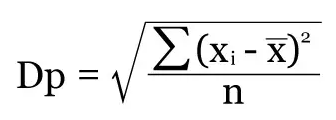

---